# OrthogonalProcrustes

OrthogonalProcrustes helps a dataset X, to align with another dataset Y. It can be applied to two datasets that have same number of entries and some correspondence between the entries. In graph embeddings, it means that the vertex i in graph X has the same latent position as the vertex i in graph Y. It has similar function as scipy.linal.orthogonal_procrustes(). 
For more information, see [reference](https://graspy.neurodata.io/reference/align.html)

In [1]:
import graspologic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

%matplotlib inline

Here is a simple example of aligning two datasets with different entries using OrthogonalProcrustes. First, introduce two datasets X,Y with same entries.

In [8]:
np.random.seed(2)
X = np.random.rand(10,2)
Y = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = Y@Z

Then use OrthogonalProcrustes to get the transformed dataset, X_prime_Orthogonal.

In [9]:
from graspologic.align import OrthogonalProcrustes
X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_OrthogonalProcrustes. Plot X, Y, X@Q_OrthogonalProcrustes

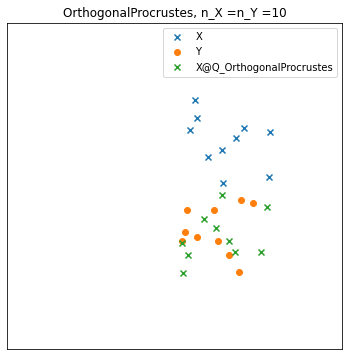

In [10]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, n_X =n_Y =10")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", marker='x')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Here, we introduce np.linlg.norm to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [149]:
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
print(norm_Orthogonal)

1.1718904779030868


When the two datasets are with different entries, OrthogonalProcrustes will be not applicable. If you try that with OrthogonalProcrustes, there should be a ValueError. Please use SeedlessProcrustes for aligning two datasets with different shapes.